In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
data = pd.read_csv('Company_Data.csv')



In [12]:
# Define a threshold for categorizing 'Sales' into high/low categories
threshold = 8.0
data['Sales_Category'] = data['Sales'].apply(lambda x: 'High' if x >= threshold else 'Low')

In [13]:
data_encoded = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

In [14]:
X = data_encoded.drop(['Sales', 'Sales_Category'], axis=1)
y = data_encoded['Sales_Category']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = decision_tree_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [19]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.76      0.68      0.71        37
         Low       0.74      0.81      0.78        43

    accuracy                           0.75        80
   macro avg       0.75      0.74      0.75        80
weighted avg       0.75      0.75      0.75        80

[[25 12]
 [ 8 35]]


In [20]:
### data visualisation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


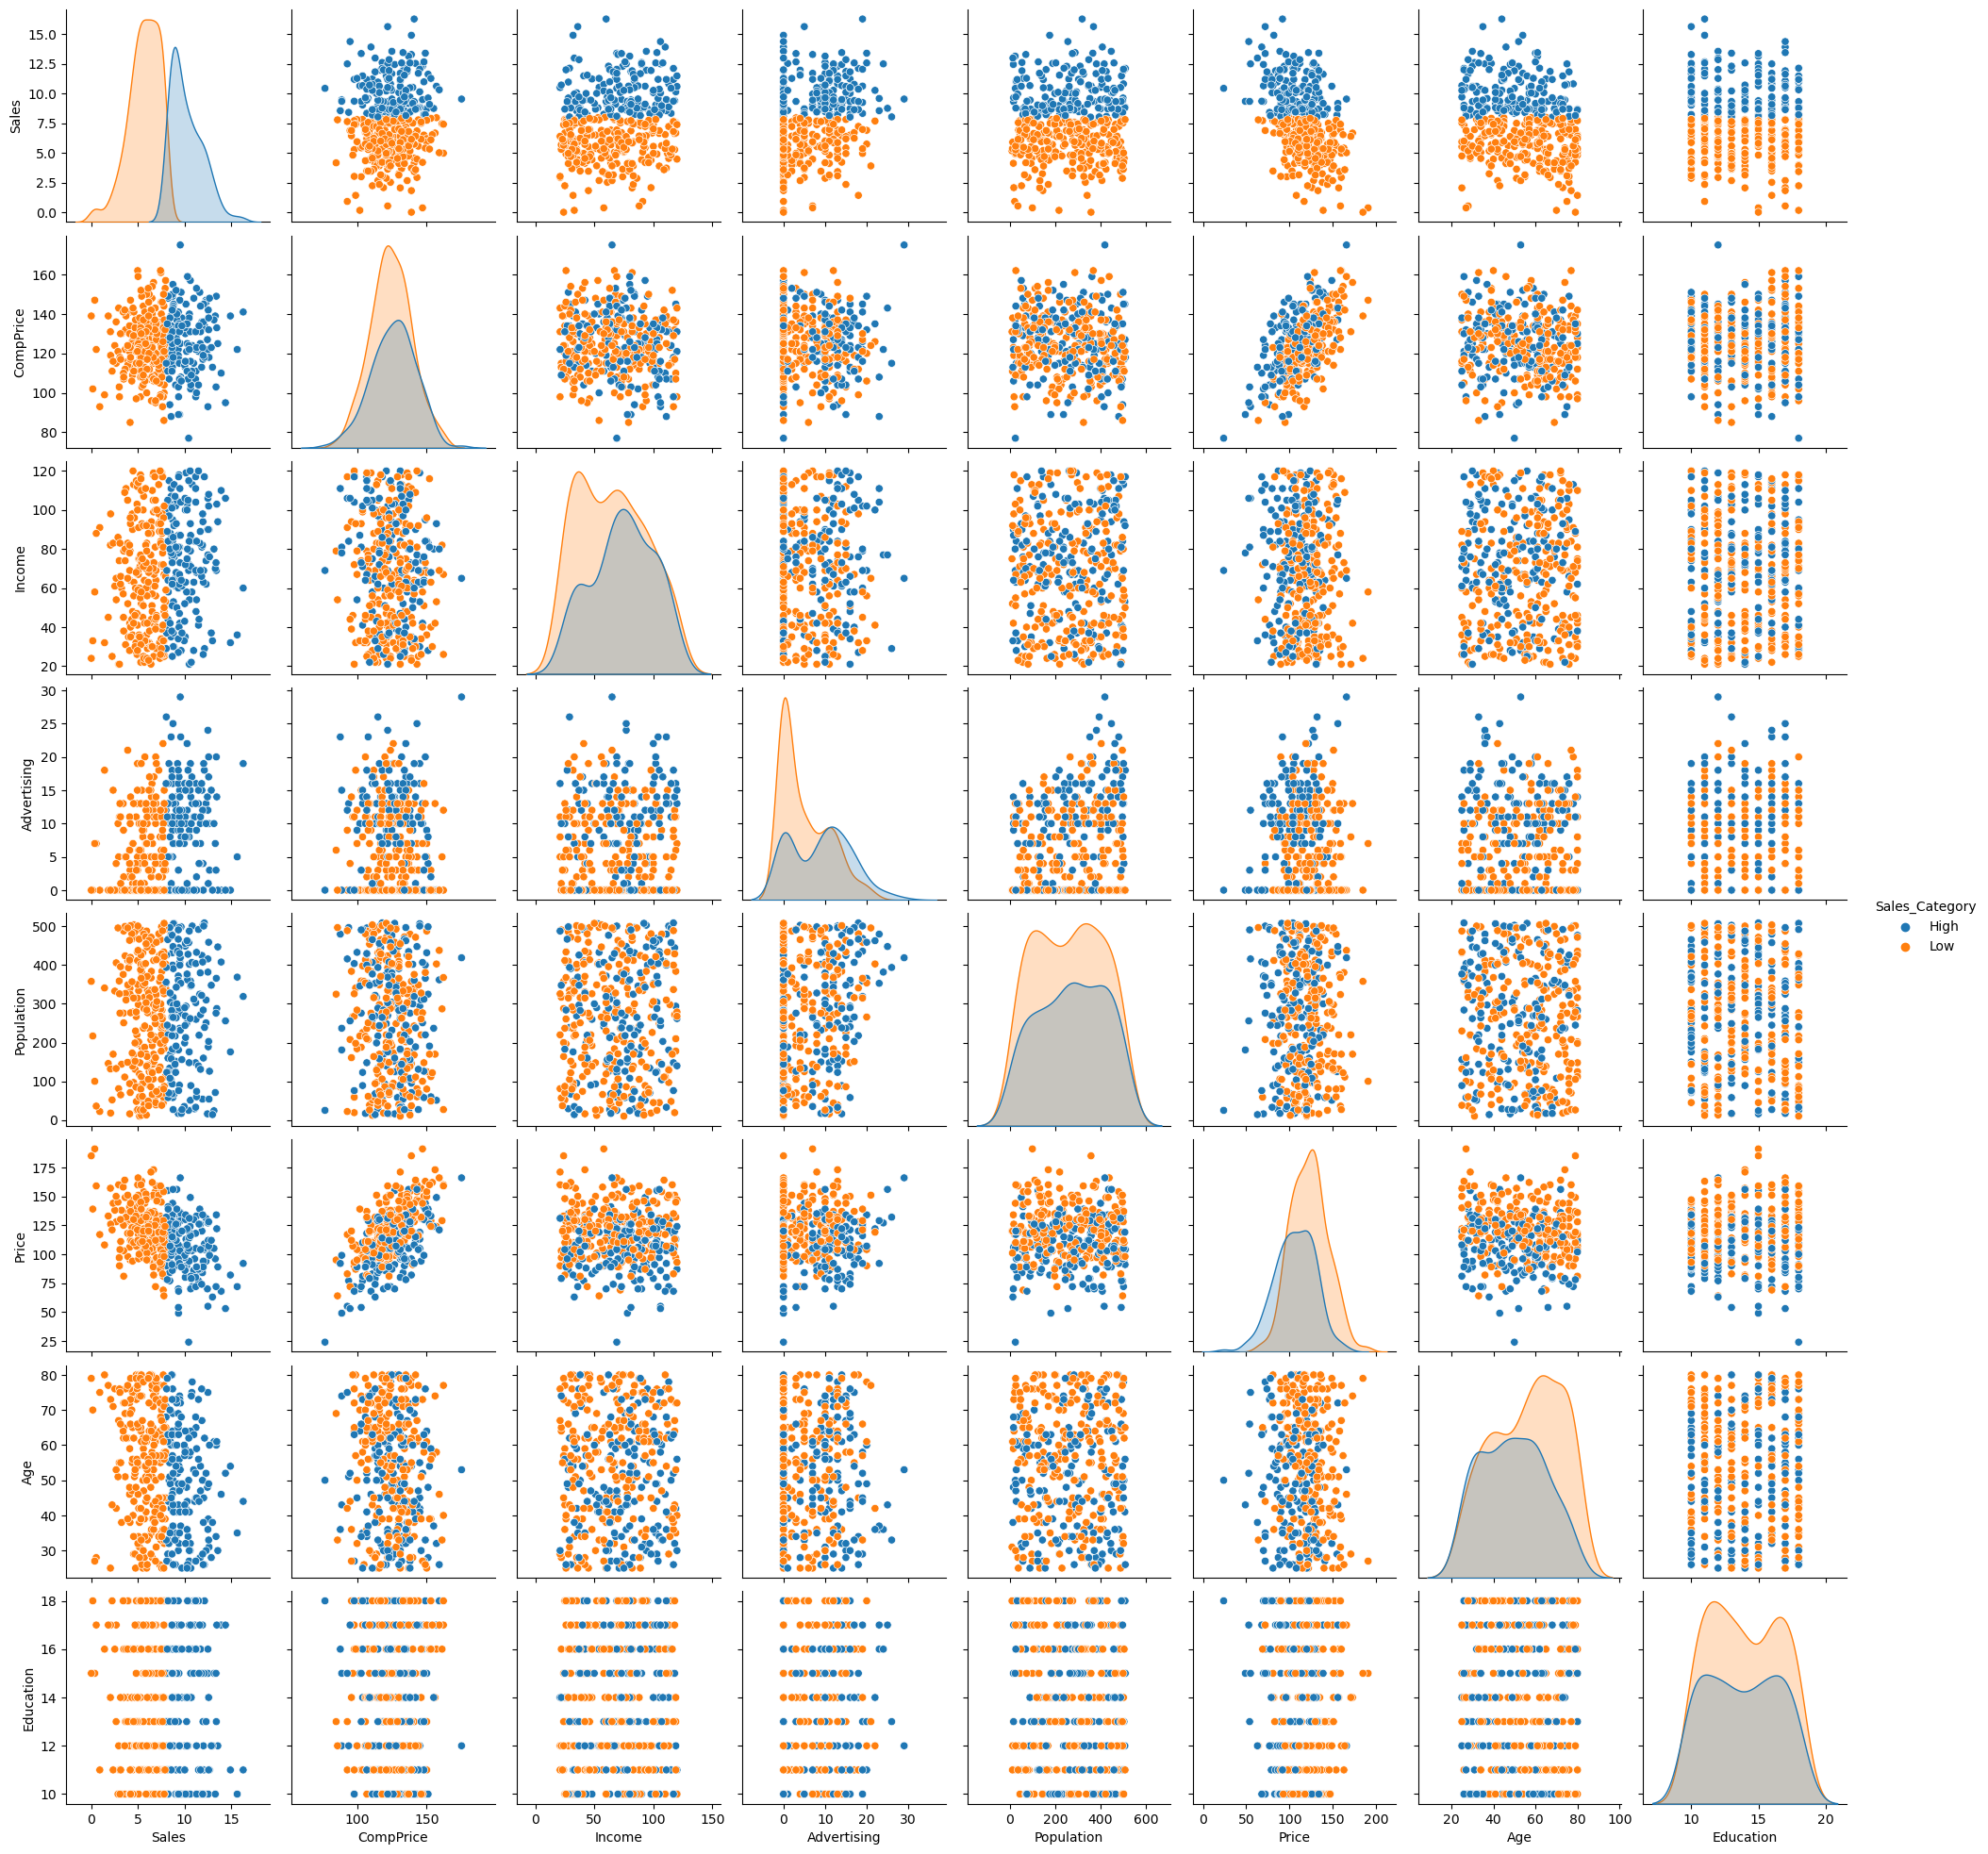

In [25]:
# Pairplot: Visualize relationships between numeric variables
sns.pairplot(data, hue='Sales_Category', diag_kind='kde')
plt.show()

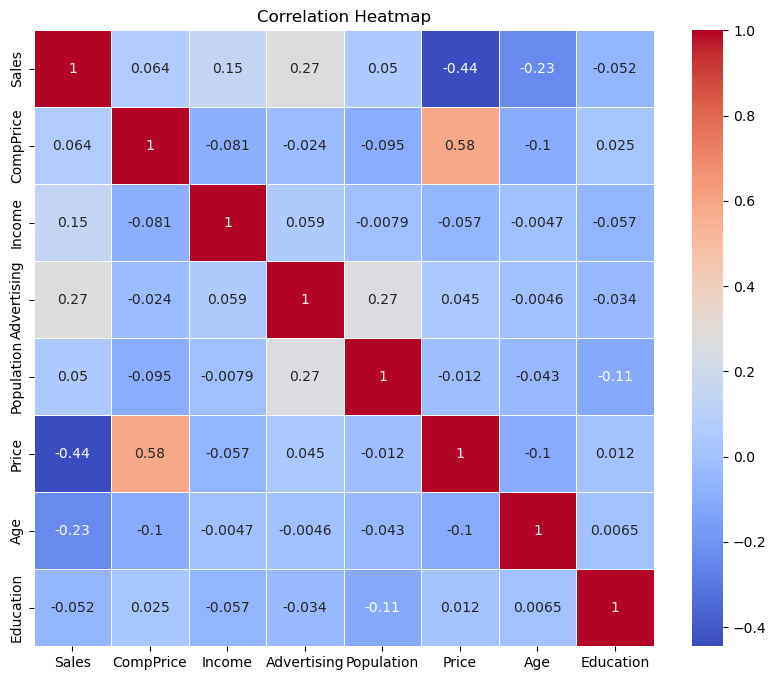

In [26]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

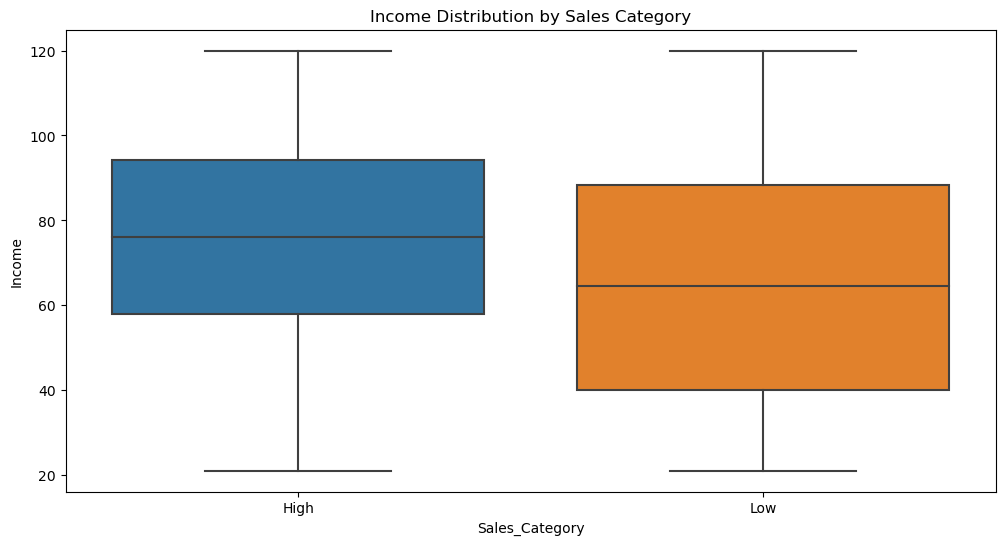

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales_Category', y='Income', data=data)
plt.title('Income Distribution by Sales Category')
plt.show()


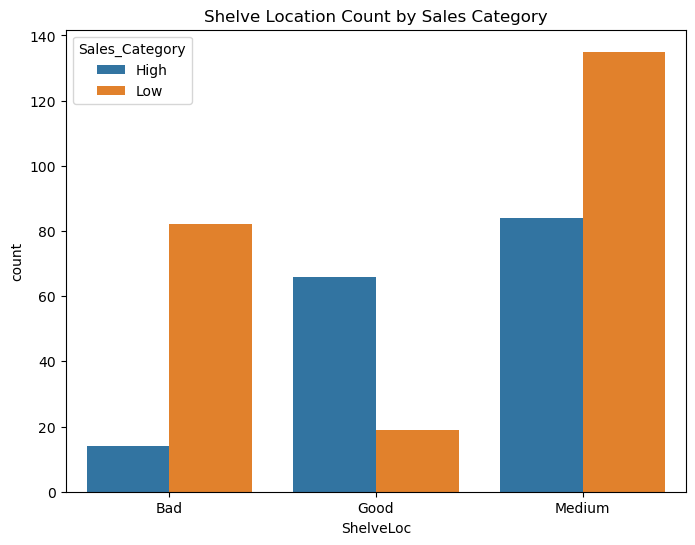

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ShelveLoc', hue='Sales_Category', data=data)
plt.title('Shelve Location Count by Sales Category')
plt.show()


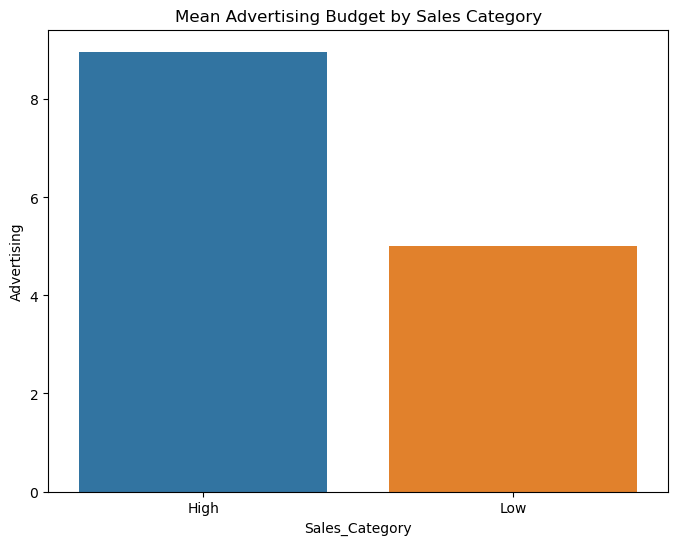

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sales_Category', y='Advertising', data=data, ci=None)
plt.title('Mean Advertising Budget by Sales Category')
plt.show()


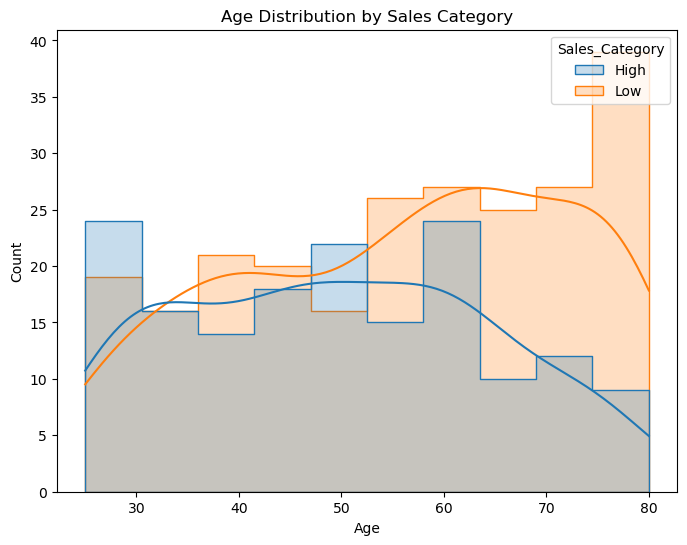

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Sales_Category', element='step', common_norm=False, kde=True)
plt.title('Age Distribution by Sales Category')
plt.show()
